<a href="https://colab.research.google.com/github/kfahn22/computer-vision-course/blob/synthetic_data_creatiion/blenderproc_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Data Creation with BlenderProc

BlenderProc was proposed in [BlenderProc](https://arxiv.org/pdf/1911.01911.pdf) by Denninger, et. al. and is a modular pipeline built on top of [Blender](https://www.blender.org/). It can be used to generate images in a variety of use cases, including segmentation, depth, normal and pose estimation.  This notebook is adapted from [here](https://github.com/DLR-RM/BlenderProc/blob/main/examples/basics/basic/basic_example.ipynb) and demos the basic examples which are available under `examples/basic`.

We will see how we can set up the BlenderProc environment inside Google Colab and generate photorealistic data which can be used to train machine learning models.

First, we will clone the official [BlenderProc repository](https://github.com/DLR-RM/BlenderProc) from GitHub using Git.

In [ ]:
!git clone https://github.com/DLR-RM/BlenderProc.git
%cd "BlenderProc"

To be able to use the blenderproc command, we install it via pip:

In [ ]:
!pip install -e .

We first have to update the `LD_PRELOAD` environment variable

In [ ]:
import os

os.environ["LD_PRELOAD"] = ""

!apt remove libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.5.9"

To be able to use matplotlib inside BlenderProc, we have to install ipykernel inside blender's python environment. As this is the first blenderproc command, it will also install blender first:

In [ ]:
!blenderproc pip install ipykernel --blender-install-path ./

## Usage

BlenderProc provides some basic scripts to help get us started.  Let's start by running their basic example.

* We run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/basic/main.py`.

* The second argument corresponds to the camera pose file. In this case, we have specified two camera poses in the `examples/basics/basic/camera_positions` file. Pro tip:  you can edit the camera_positions file the generate more camera poses by double-clicking on the file on it.

* The third argument correponds to the output directory where our generated data will be stored.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/basic/main.py examples/resources/camera_positions examples/resources/scene.obj examples/basics/basic/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_1c66604ef6a34884a6afac352702a4bf
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

We visualize the second rendered color, depth and normal image which corresponds to the `1.hdf5` file inside the `examples/basics/basic/output` folder

examples/basics/basic/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


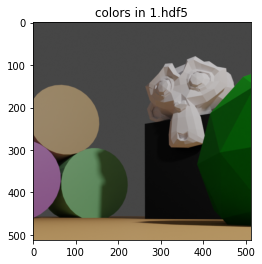

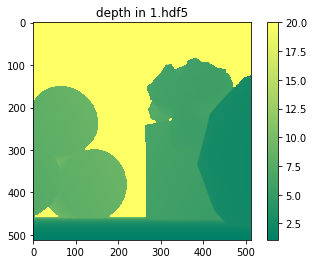

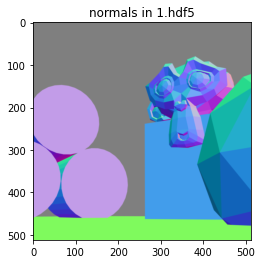

In [ ]:
# Visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/basic/output/1.hdf5"

## Camera Object Pose Example

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/camera_object_pose/main.py`.

* The second argument corresponds to the object file-`examples/basics/camera_object_pose/obj_000004.ply`.

* The third argument correponds to the output directory where our generated data will be stored-`examples/basics/camera_object_pose/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/camera_object_pose/main.py examples/basics/camera_object_pose/obj_000004.ply examples/basics/camera_object_pose/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_966c827f6a5540a8827d0b60beadf2d6
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

## Camera Sampling Example

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/camera_sampling/main.py`.

* The second argument corresponds to the scene object file-`examples/resources/scene.obj`.

* The third argument correponds to the output directory where our generated data will be stored-`examples/basics/camera_sampling/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/camera_sampling/main.py examples/resources/scene.obj examples/basics/camera_sampling/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_a9cfb419181a403f8ac145e866db6909
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

examples/basics/camera_sampling/output/0.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


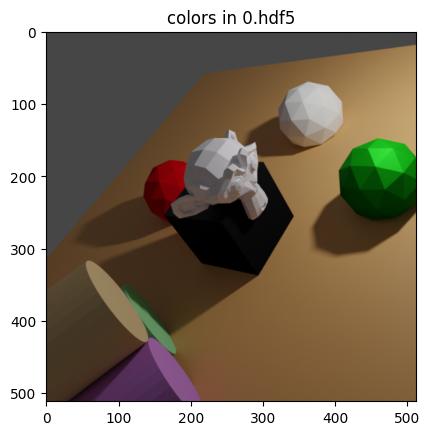

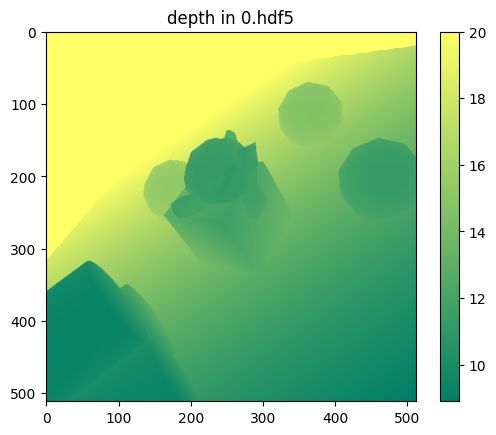

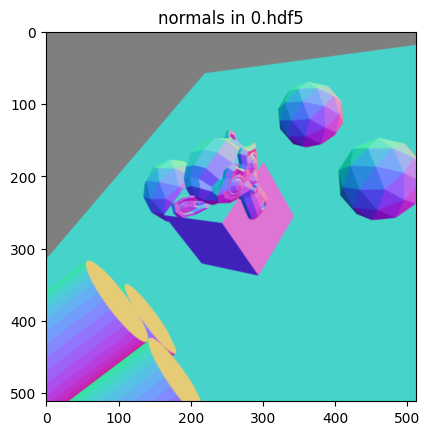

In [ ]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/camera_sampling/output/0.hdf5"

examples/basics/camera_sampling/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


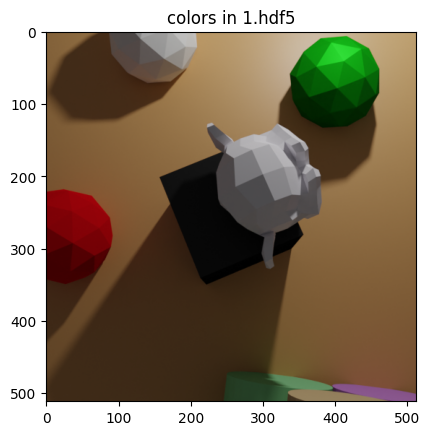

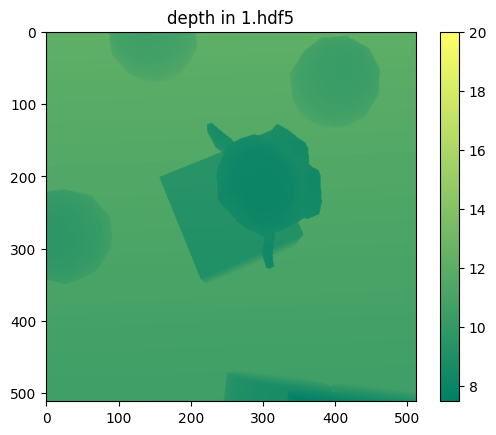

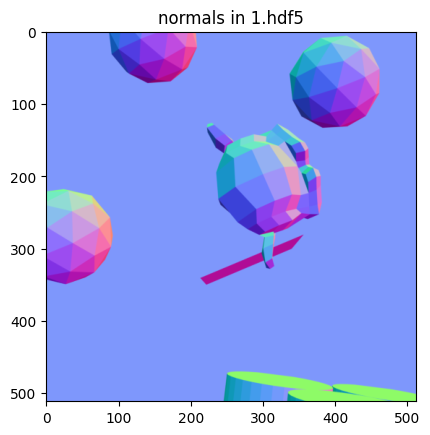

In [ ]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/camera_sampling/output/1.hdf5"

## Entity Manipulation Example

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/entity_manipulation/main.py`.

* The second argument corresponds to the scene object file-`examples/resources/scene.obj`.

* The third argument correponds to the output directory where our generated data will be stored-`examples/basics/entity_manipulation/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/entity_manipulation/main.py examples/resources/scene.obj examples/basics/entity_manipulation/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_4980bea2a69a430d912063d59044cc71
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

examples/basics/entity_manipulation/output/0.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


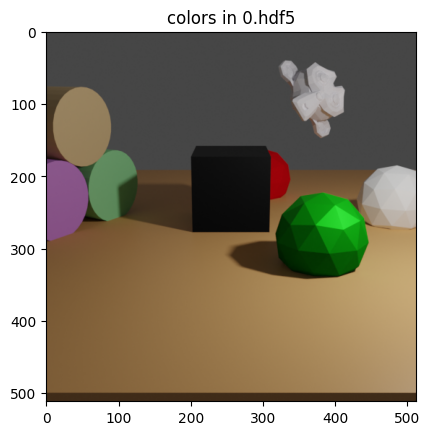

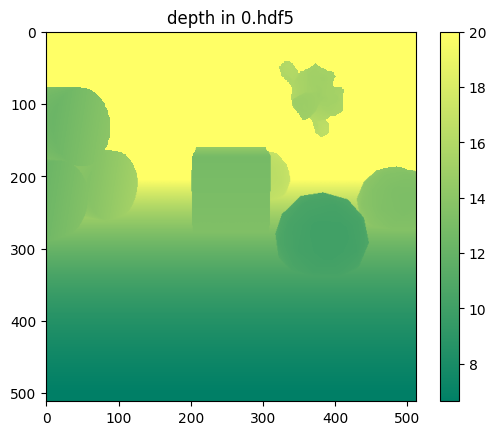

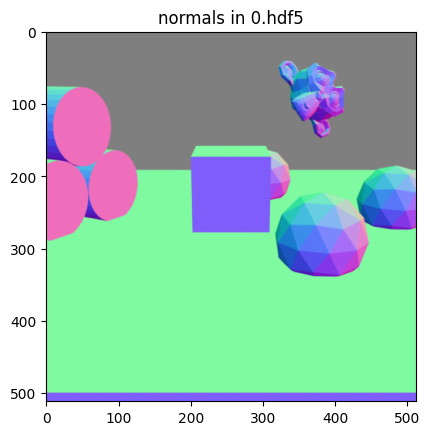

In [ ]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/entity_manipulation/output/0.hdf5"

examples/basics/entity_manipulation/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


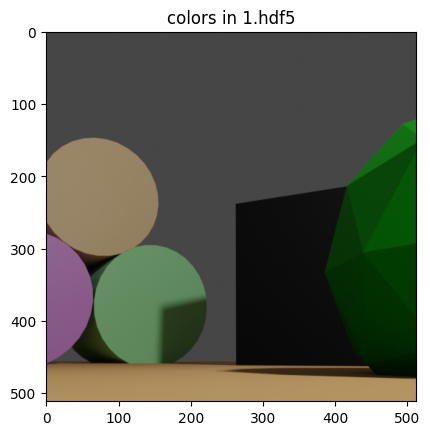

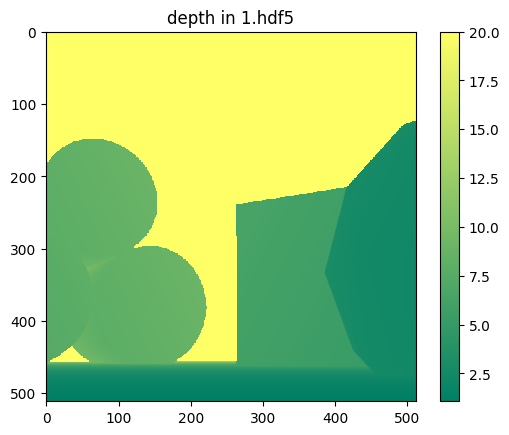

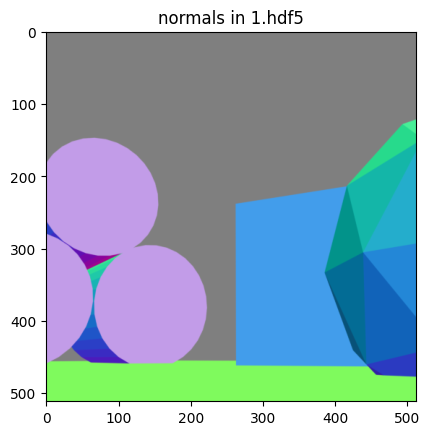

In [ ]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/entity_manipulation/output/1.hdf5"

## Light Sampling Example

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/light_sampling/main.py`.

* The second argument corresponds to the scene object file-`examples/resources/scene.obj`.

* The third argument correponds to the output directory where our generated data will be stored-`examples/basics/light_sampling/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/light_sampling/main.py examples/resources/camera_positions examples/resources/scene.obj examples/basics/light_sampling/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_4dfb8cde34f5451ab797eb0a26ac2ce5
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

examples/basics/light_sampling/output/0.hdf5: 
Keys: 'colors': (512, 512, 3)


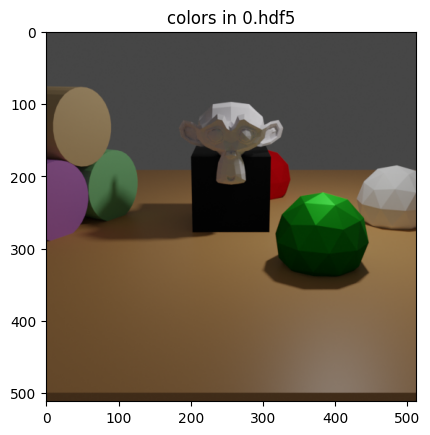

In [ ]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/light_sampling/output/0.hdf5"

examples/basics/light_sampling/output/1.hdf5: 
Keys: 'colors': (512, 512, 3)


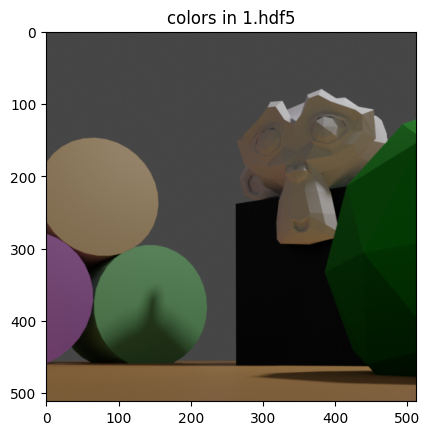

In [ ]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/light_sampling/output/1.hdf5"

## Physics Positioning

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/physics_positioning/main.py`.

* The second argument corresponds to the object file-`examples/basics/physics_positioning/passive.obj`.

* The third argument correponds to the output directory where our generated data will be stored-`examples/basics/physics_positioning/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/physics_positioning/main.py examples/basics/physics_positioning/active.obj examples/basics/physics_positioning/passive.obj examples/basics/physics_positioning/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_88727d495fb149fbb2cc5ea633e0885b
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

examples/basics/physics_positioning/output/0.hdf5: 
Keys: 'colors': (512, 512, 3)


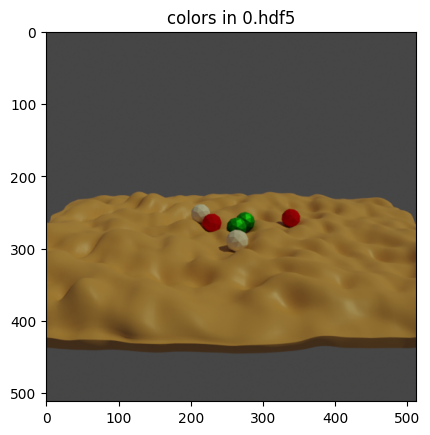

In [ ]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/physics_positioning/output/0.hdf5"

## Material Manipulation

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed-`examples/basics/material_manipulation/main.py`.

* The second argument corresponds to the object file-`examples/basics/material_manipulation/scene.obj`.

* The third argument correponds to the output directory where our generated data will be stored-`examples/basics/material_manipulation/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/material_manipulation/main.py examples/basics/material_manipulation/scene.obj images examples/basics/material_manipulation/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_60b506e7d8d64b768a3d51cbd1f892d9
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

examples/basics/material_manipulation/output/0.hdf5: 
Keys: 'colors': (512, 512, 3)


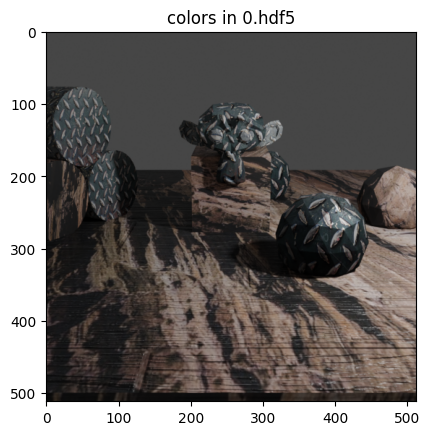

In [ ]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/material_manipulation/output/0.hdf5"

examples/basics/material_manipulation/output/1.hdf5: 
Keys: 'colors': (512, 512, 3)


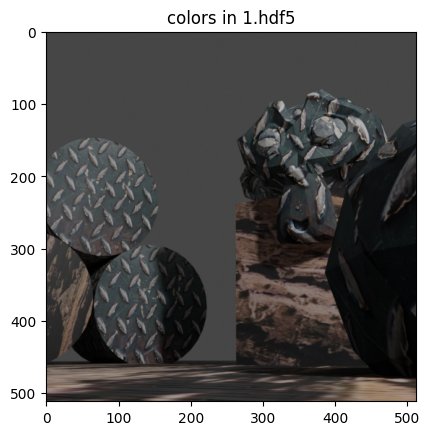

In [ ]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/material_manipulation/output/1.hdf5"

## Semantic Segmentation Example

* Reminder: we run the BlenderProc program using the `blenderproc run`  along with required command line arguments.

* The first argument specifies the location of the python file that should be executed:  `examples/basics/semantic_segmentation/main.py`.

* The second argument corresponds to the camera pose file:  `examples/resources/camera_positions`.

* The third argument corresponds to the blend file:  `examples/basics/semantic_segmentation/scene.blend`.

* The fourth argument correponds to the output directory where our generated data will be stored:  `examples/basics/semantic_segmentation/output`.

* We specify the custom Blender install plath with the flag `--blender-install-path` which is necessary because no user folder is available in colab.

In [ ]:
!blenderproc run examples/basics/semantic_segmentation/main.py examples/resources/camera_positions examples/basics/semantic_segmentation/scene.blend examples/basics/semantic_segmentation/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_30b6f9b755674c189154329f46637d69
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/content/BlenderProc/blender-3.5.1-linux-x64/3.5/python/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/content/BlenderProc/blender-3.5.1-linux-x

examples/basics/semantic_segmentation/output/0.hdf5: 
Keys: 'category_id_segmaps': (512, 512), 'colors': (512, 512, 3), 'depth': (512, 512), 'instance_segmaps': (512, 512)


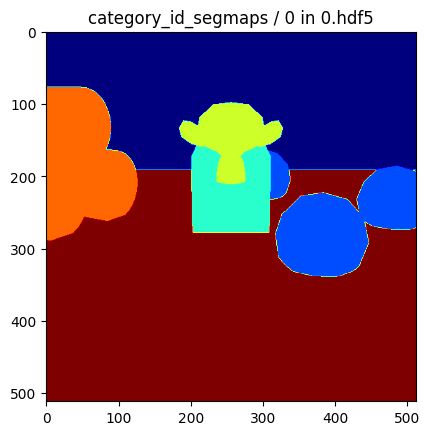

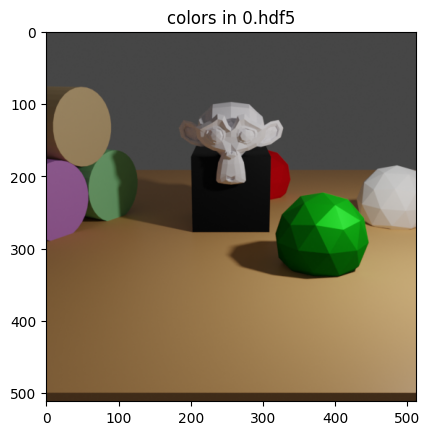

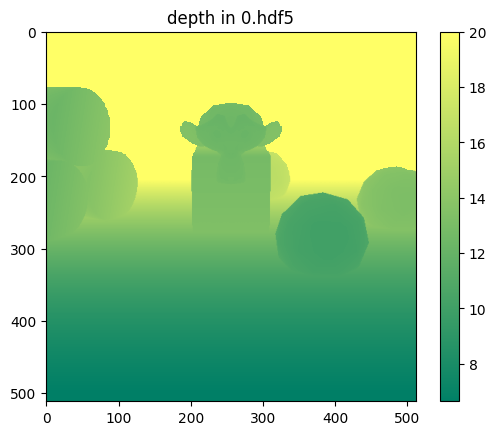

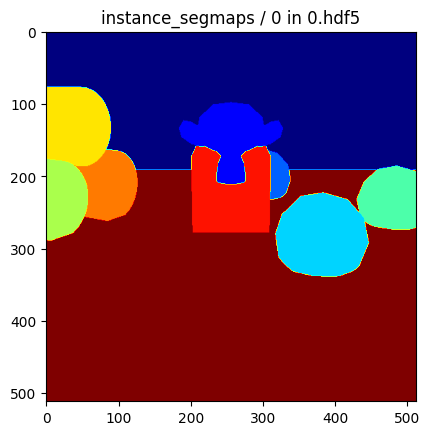

In [ ]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/semantic_segmentation/output/0.hdf5"